In [2]:
import sys
!{sys.executable} -m pip install pandas


  Using cached numpy-2.4.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 44.2 MB/s  0:00:00 eta 0:00:01
Using cached numpy-2.4.1-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]


In [3]:
import sqlite3
import pandas as pd

# DB接続
conn = sqlite3.connect("final.db")

# テーブルをDataFrameとして取得
df = pd.read_sql("SELECT * FROM tokyo_rent", conn)

conn.close()

print(df)


         区  平均家賃（万円）
0     千代田区      11.4
1      中央区      10.8
2       港区      11.6
3      新宿区      10.3
4      文京区       9.0
..     ...       ...
58    八丈支庁       NaN
59  八丈島八丈町       NaN
60    青ヶ島村       NaN
61   小笠原支庁       NaN
62    小笠原村       NaN

[63 rows x 2 columns]


In [5]:
print("平均家賃:", df["平均家賃（万円）"].mean())
print("最高家賃:", df["平均家賃（万円）"].max())
print("最低家賃:", df["平均家賃（万円）"].min())


平均家賃: 7.31764705882353
最高家賃: 11.6
最低家賃: 3.5


In [6]:
top5 = df.sort_values("平均家賃（万円）", ascending=False).head(5)
print(top5)


       区  平均家賃（万円）
2     港区      11.6
0   千代田区      11.4
1    中央区      10.8
12   渋谷区      10.8
3    新宿区      10.3


In [7]:
low5 = df.sort_values("平均家賃（万円）").head(5)
print(low5)


        区  平均家賃（万円）
49   西多摩郡       3.5
51    大島町       3.9
43  武蔵村山市       4.0
27    青梅市       4.8
38    福生市       4.9


In [10]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.9 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


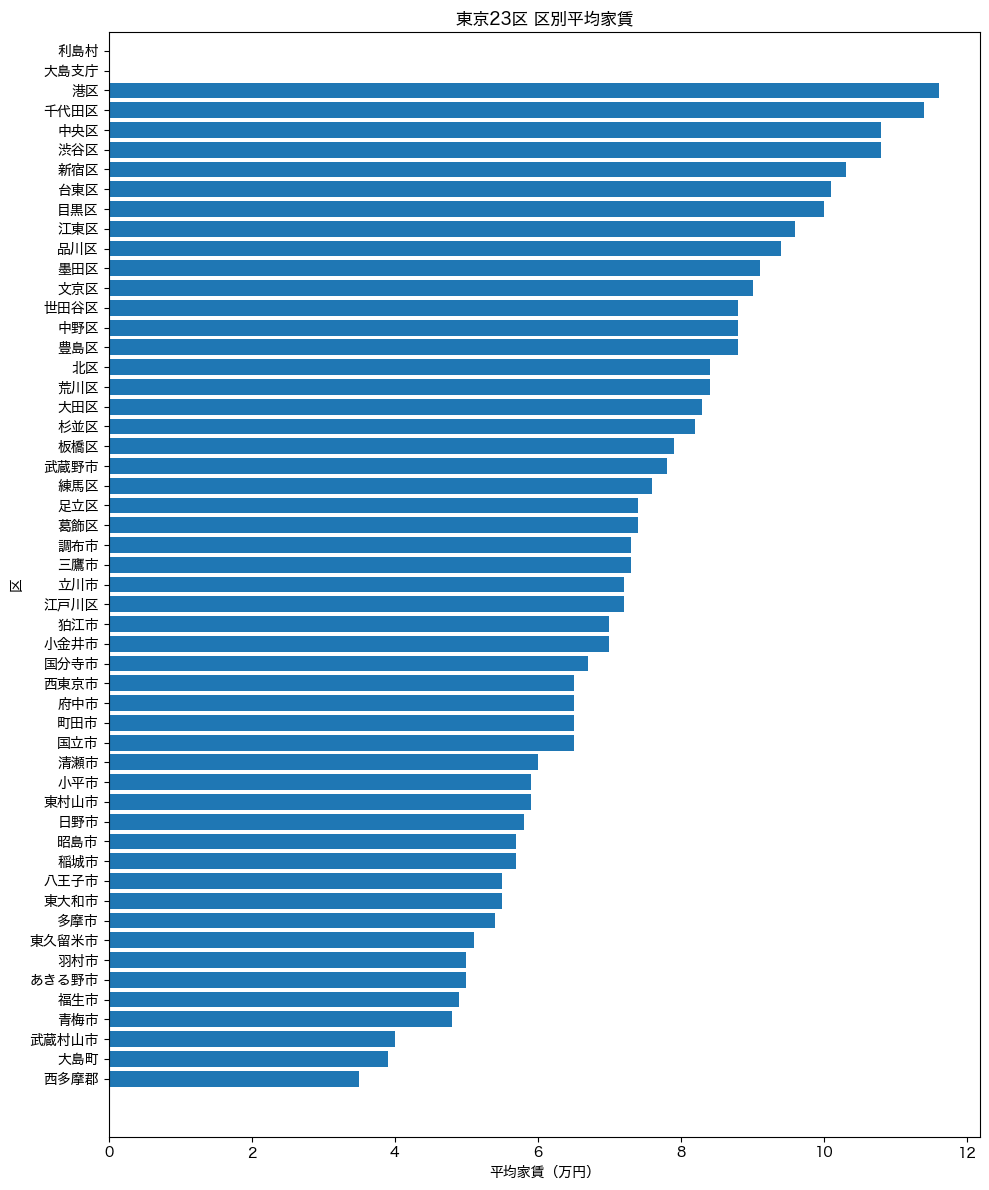

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Hiragino Sans"

df_sorted = df.sort_values("平均家賃（万円）")

plt.figure(figsize=(10, 12))
plt.barh(df_sorted["区"], df_sorted["平均家賃（万円）"])
plt.xlabel("平均家賃（万円）")
plt.ylabel("区")
plt.title("東京23区 区別平均家賃")
plt.tight_layout()
plt.show()
